In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


In [7]:
lm = LinearRegression()


In [8]:
lm.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
print(round(lm.intercept_),2)

-2640160.0 2


In [13]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


##Interpreting the Coeff 

Holding all vother features fixed a 1 unit increase of Avg.area Income is Associated with increase $21.53

Holding all vother features fixed a 1 unit increase of Avg.area House is Associated with increase $164,883.28

Holding all vother features fixed a 1 unit increase of Avg.area number of rooms is Associated with increase $122,368.67

Holding all vother features fixed a 1 unit increase of Avg.area number of bedrooms is Associated with increase $2,233.80

Holding all vother features fixed a 1 unit increase of Area Pop is Associated with increase $15.15






In [11]:
predictions = lm.predict(X_test)

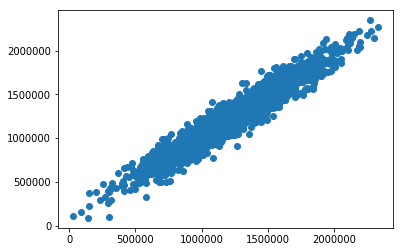

In [12]:
plt.scatter(y_test, predictions)

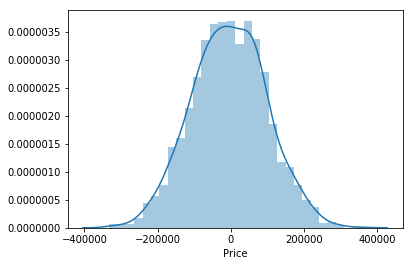

In [15]:
sns.distplot((y_test-predictions),bins=30)
# Linear Model is good choice because the plot below is weel distributed 

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

** All of these metrics are loss functions and we want to minimize them.

Import Metrics 

In [17]:
from sklearn import metrics

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MAE:', metrics.mean_squared_error(y_test,predictions))
print('MAE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))



MAE: 82288.22251914957
MAE: 10460958907.209507
MAE: 102278.82922291156
